##Integrantes:

##### Renan Mendes -  RM563145

#####Arthur Rosado  -  RM562061

# Leitura inicial do DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
dados = pd.read_csv('seeds_dataset.txt', delim_whitespace=True)


/tmp/ipython-input-3-591836631.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dados = pd.read_csv('seeds_dataset.txt', delim_whitespace=True)


In [4]:
nomes_colunas = ['Area', 'Perímetro', 'Compacidade', 'Comprimento do Núcleo', 'Largura do Núcleo', 'Coeficiente de Assimetria', 'Comprimento do Sulco do Núcleo', 'Especie']
dados.columns = nomes_colunas
especies = {
    1: 'Kama',
    2: 'Rosa',
    3: 'Canadian'
}
dados['Especie'] = dados['Especie'].map(especies)
dados

,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo,Especie
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


# Analise e pre processamento dos dados

In [ ]:
dados.head()

,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo,Especie
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,Kama


In [ ]:
dados.shape

(209, 8)

In [ ]:
dados_Rosa = dados['Especie'] == 'Rosa'
dados_filtro_rosa = dados[dados_Rosa]
dados_filtro_rosa.describe()

,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


In [ ]:
dados_Canadian = dados['Especie'] == 'Canadian'
dados_filtro_canadian = dados[dados_Canadian]
dados_filtro_canadian
dados_filtro_canadian.describe()

,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000


In [ ]:
dados_Kama = dados['Especie'] == 'Kama'
dados_filtro_kama = dados[dados_Kama]
dados_filtro_kama.describe()

,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,14.321014,14.286377,0.880201,5.504362,3.243652,2.673872,5.085290
std,1.219380,0.576970,0.016272,0.231116,0.178727,1.181244,0.265135
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.740000,13.940000,0.868600,5.384000,3.129000,1.791000,4.914000
50%,14.340000,14.290000,0.881100,5.527000,3.242000,2.587000,5.091000
75%,15.030000,14.680000,0.891100,5.674000,3.379000,3.328000,5.224000
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000


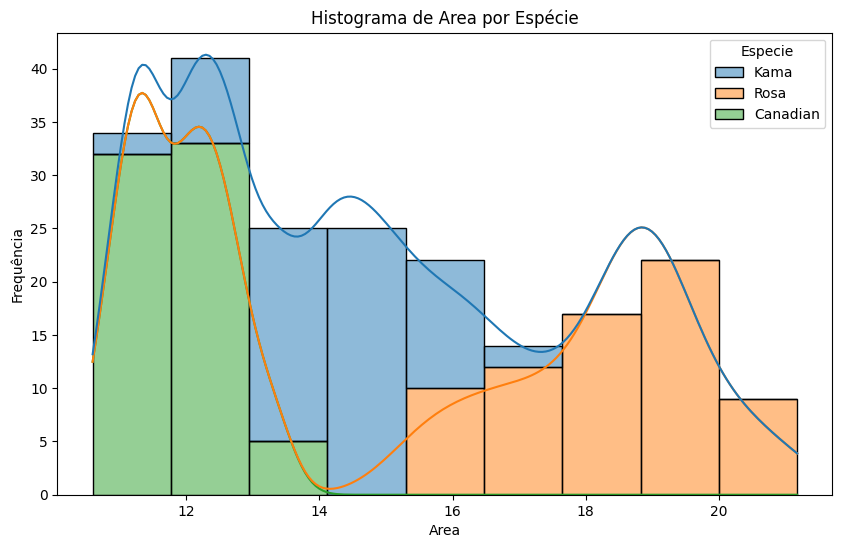

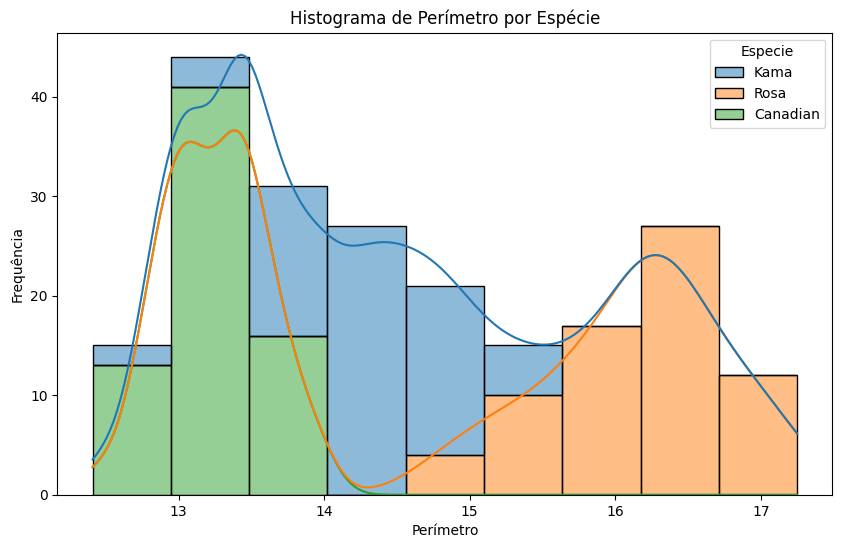

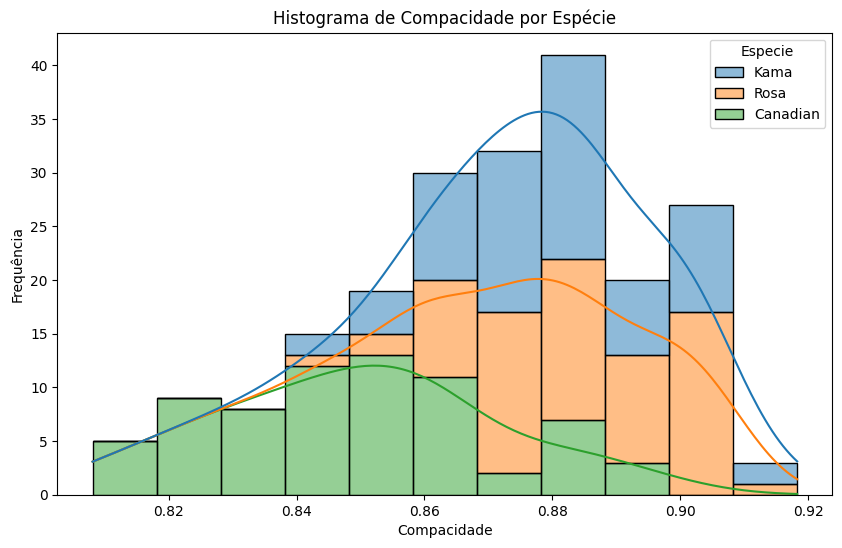

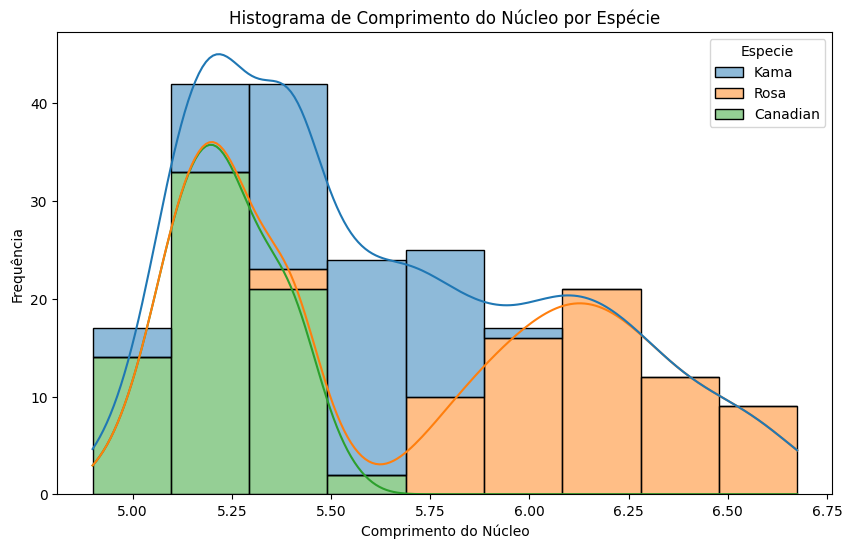

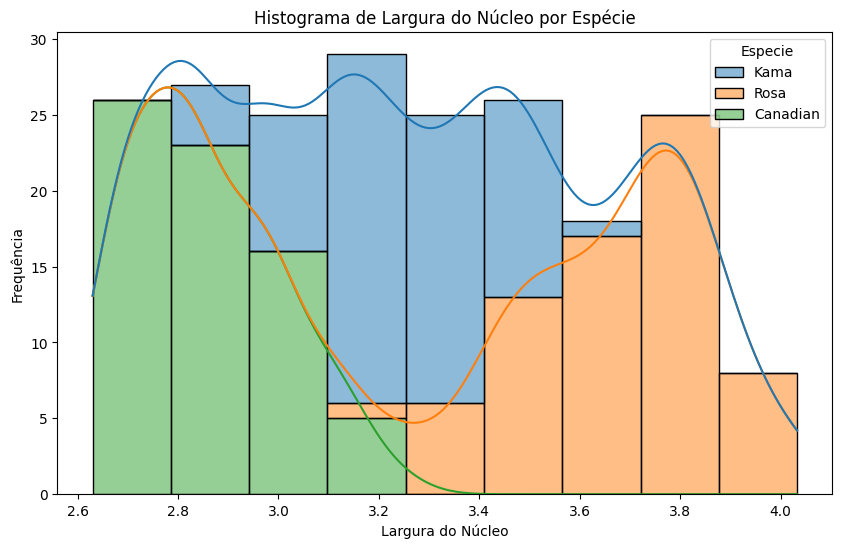

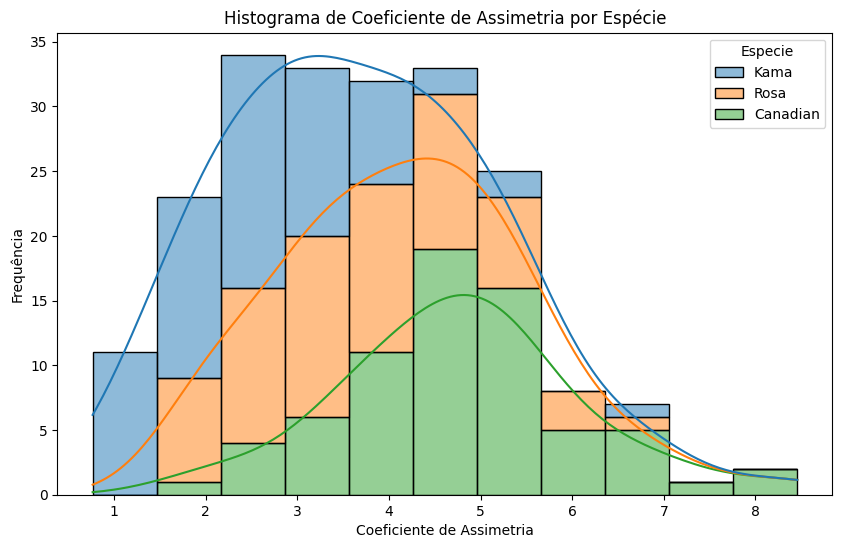

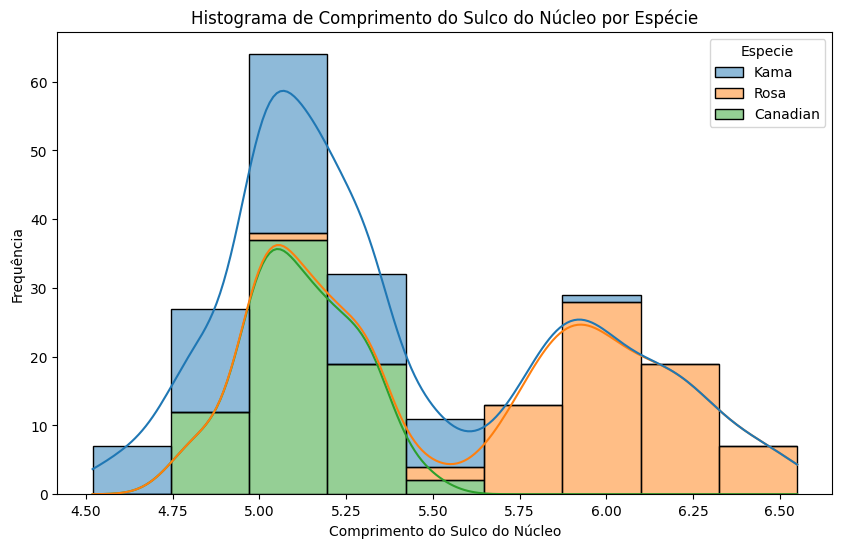

In [ ]:


features = dados.columns[:-1]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dados, x=feature, hue='Especie', multiple="stack", kde=True)
    plt.title(f'Histograma de {feature} por Espécie')
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.show()


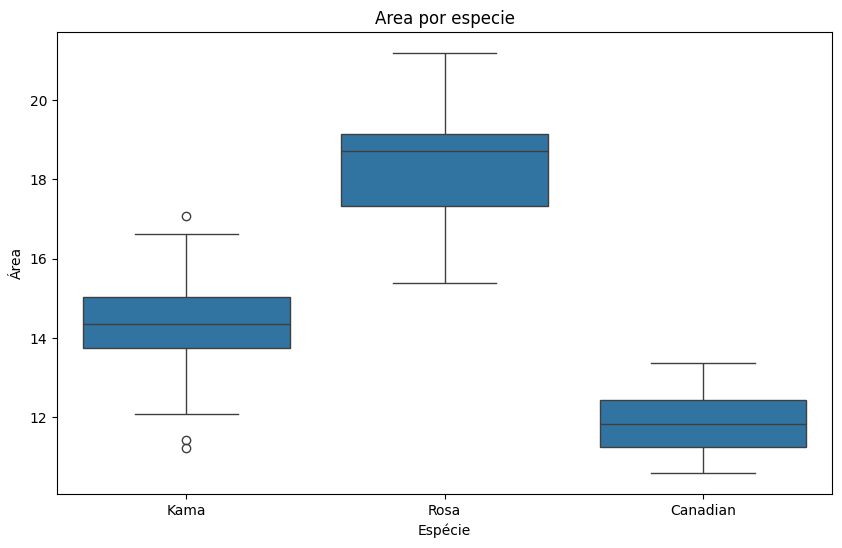

<ipython-input-84-4108387086>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='Especie', palette='viridis')


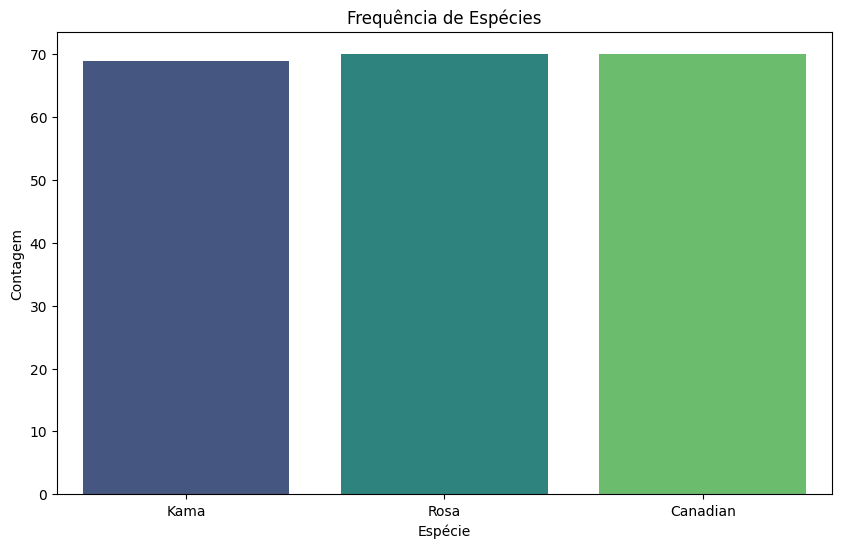

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados, x='Especie', y='Area')
plt.title('Area por especie')
plt.xlabel('Espécie')
plt.ylabel('Área')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Especie', palette='viridis')
plt.title('Frequência de Espécies')
plt.xlabel('Espécie')
plt.ylabel('Contagem')
plt.show()

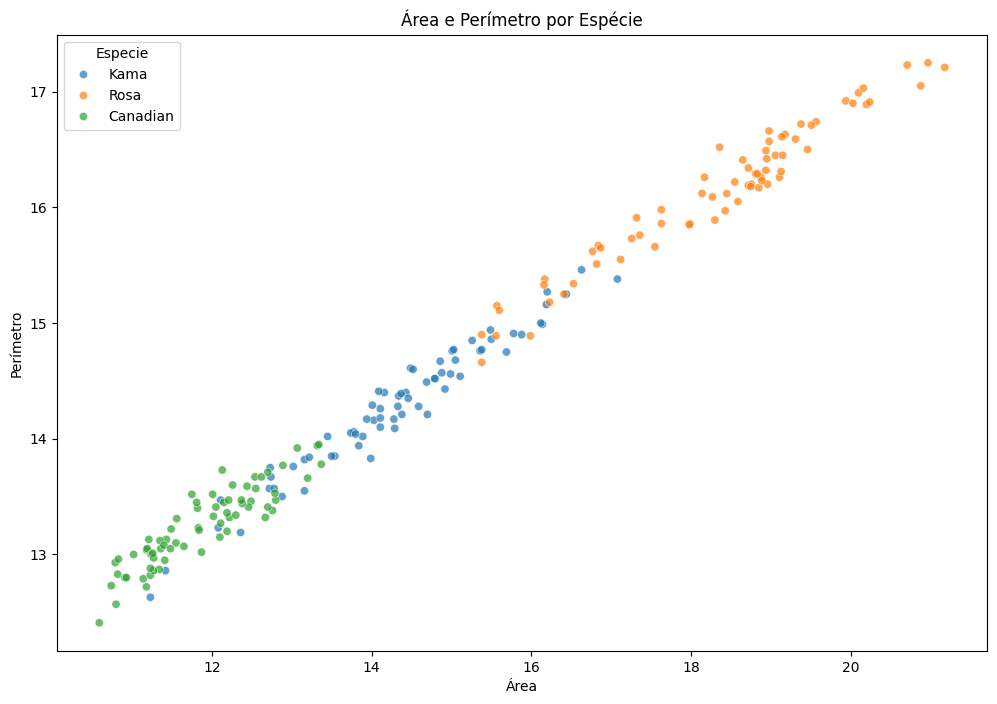

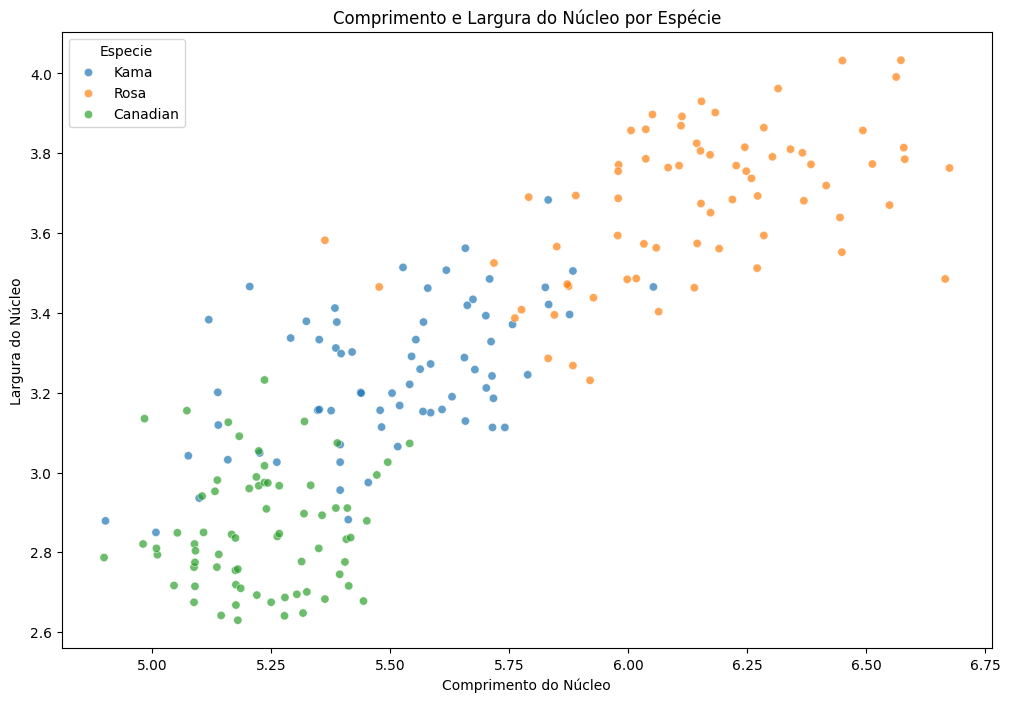

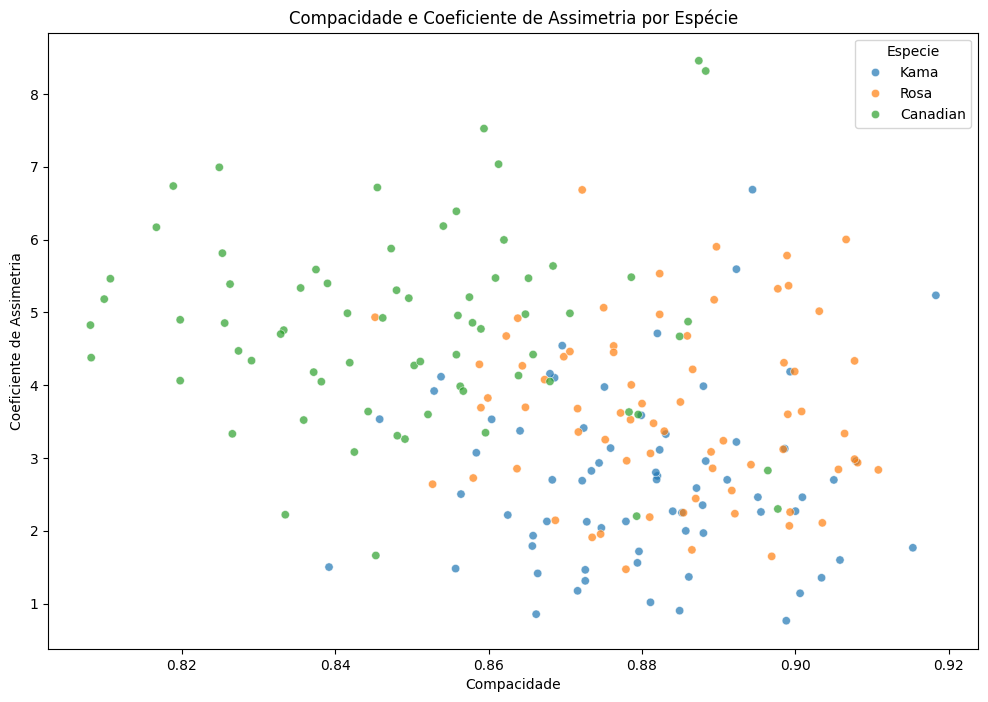

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dados, x='Area', y='Perímetro', hue='Especie', alpha=0.7)
plt.title('Área e Perímetro por Espécie')
plt.xlabel('Área')
plt.ylabel('Perímetro')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dados, x='Comprimento do Núcleo', y='Largura do Núcleo', hue='Especie', alpha=0.7)
plt.title('Comprimento e Largura do Núcleo por Espécie')
plt.xlabel('Comprimento do Núcleo')
plt.ylabel('Largura do Núcleo')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dados, x='Compacidade', y='Coeficiente de Assimetria', hue='Especie', alpha=0.7)
plt.title('Compacidade e Coeficiente de Assimetria por Espécie')
plt.xlabel('Compacidade')
plt.ylabel('Coeficiente de Assimetria')
plt.show()

In [ ]:
dados.isnull().sum()

,0
Area,0
Perímetro,0
Compacidade,0
Comprimento do Núcleo,0
Largura do Núcleo,0
Coeficiente de Assimetria,0
Comprimento do Sulco do Núcleo,0
Especie,0


# Escalonamento e normalização

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(dados.iloc[:, :-1]) # Apply to all columns except the last one
# min maxscaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(dados.iloc[:, :-1]) # Apply to all columns except the last one

dados_scaled = pd.DataFrame(X_scaled, columns=dados.columns[:-1])
display(dados_scaled.head())

df_minmax = pd.DataFrame(X_minmax_scaled, columns=dados.columns[:-1])
display(df_minmax.head())

,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo
0,0.011840,0.009234,0.427494,-0.166808,0.197647,-1.792787,-0.921971
1,-0.190940,-0.358353,1.438945,-0.760533,0.208238,-0.672161,-1.188607
2,-0.345602,-0.473224,1.036904,-0.686035,0.319438,-0.965484,-1.229314
3,0.444896,0.330872,1.371233,0.067974,0.803955,-1.568128,-0.476222
4,-0.160007,-0.266457,1.019976,-0.546070,0.142047,-0.830155,-0.921971


,Area,Perímetro,Compacidade,Comprimento do Núcleo,Largura do Núcleo,Coeficiente de Assimetria,Comprimento do Sulco do Núcleo
0,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
1,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
2,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
3,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
4,0.357885,0.371901,0.789474,0.274212,0.486101,0.220637,0.215165


# Implementar modelos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:

# x e y pra fazer o split

x = dados.drop('Especie', axis=1)
y = dados['Especie']

# dividindo em 70% treino e 30% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# random_state garante estabilidade, pela seed especifica
#conjunto de dados
print(f"Tamanho do conjunto original: {x.shape}")
print(f"Tamanho do conjunto para treino: {x_train.shape}")
print(f"Tamanho do conjunto para teste: {x_test.shape}")
# Exibir as primeiras linhas do conjunto antes e depois do split
print("Conjunto de dados antes do split:")
display(dados['Especie'].tail())
print("\nConjunto de treinamento:")
display(y_train.head())

Tamanho do conjunto original: (209, 7)
Tamanho do conjunto para treino: (156, 7)
Tamanho do conjunto para teste: (53, 7)
Conjunto de dados antes do split:


,Especie
204,Canadian
205,Canadian
206,Canadian
207,Canadian
208,Canadian



Conjunto de treinamento:


,Especie
107,Rosa
177,Canadian
127,Rosa
197,Canadian
25,Kama


In [ ]:
model = RandomForestClassifier()
#treinar modelo
model.fit(x_train, y_train)
#predicao
y_pred = model.predict(x_test)


              precision    recall  f1-score   support

    Canadian       0.90      1.00      0.95        18
        Kama       0.95      0.90      0.93        21
        Rosa       1.00      0.93      0.96        14

    accuracy                           0.94        53
   macro avg       0.95      0.94      0.95        53
weighted avg       0.95      0.94      0.94        53


Matriz de Confusão:
[[18  0  0]
 [ 2 19  0]
 [ 0  1 13]]


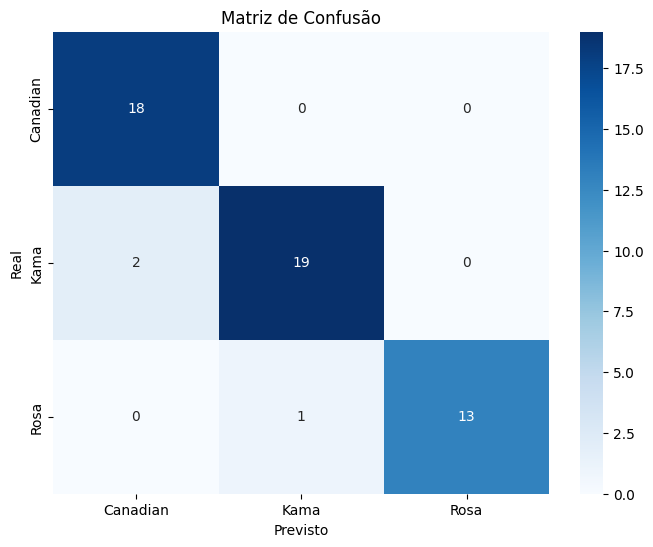


Precisão (Macro Average): 0.95
Recall (Macro Average): 0.94
F1-Score (Macro Average): 0.95


In [ ]:


print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nPrecisão (Macro Average): {precision:.2f}")
print(f"Recall (Macro Average): {recall:.2f}")
print(f"F1-Score (Macro Average): {f1:.2f}")


In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)


print(classification_report(y_test, y_pred_svm))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_svm))
print(f"\nAcurácia: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"\nPrecisão (Macro Average): {precision_score(y_test, y_pred_svm, average='macro'):.2f}")
print(f"Recall (Macro Average): {recall_score(y_test, y_pred_svm, average='macro'):.2f}")
print(f"F1-Score (Macro Average): {f1_score(y_test, y_pred_svm, average='macro'):.2f}")

              precision    recall  f1-score   support

    Canadian       0.86      1.00      0.92        18
        Kama       0.95      0.86      0.90        21
        Rosa       1.00      0.93      0.96        14

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.93      0.92      0.92        53


Matriz de Confusão:
[[18  0  0]
 [ 3 18  0]
 [ 0  1 13]]

Acurácia: 0.92

Precisão (Macro Average): 0.93
Recall (Macro Average): 0.93
F1-Score (Macro Average): 0.93


In [ ]:

log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(x_train, y_train)
y_pred_lr = log_reg_model.predict(x_test)

print(classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"\nAcurácia: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"\nPrecisão (Macro Average): {precision_score(y_test, y_pred_lr, average='macro'):.2f}")
print(f"Recall (Macro Average): {recall_score(y_test, y_pred_lr, average='macro'):.2f}")
print(f"F1-Score (Macro Average): {f1_score(y_test, y_pred_lr, average='macro'):.2f}")

              precision    recall  f1-score   support

    Canadian       0.90      1.00      0.95        18
        Kama       0.95      0.86      0.90        21
        Rosa       0.93      0.93      0.93        14

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.93      0.92      0.92        53


Matriz de Confusão:
[[18  0  0]
 [ 2 18  1]
 [ 0  1 13]]

Acurácia: 0.92

Precisão (Macro Average): 0.93
Recall (Macro Average): 0.93
F1-Score (Macro Average): 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

print("\nRandom Forest Classifier:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precisão (Macro Average): {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall (Macro Average): {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-Score (Macro Average): {f1_score(y_test, y_pred, average='macro'):.2f}")

print("\nSupport Vector Machine (SVM):")
print(f"Acurácia: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precisão (Macro Average): {precision_score(y_test, y_pred_svm, average='macro'):.2f}")
print(f"Recall (Macro Average): {recall_score(y_test, y_pred_svm, average='macro'):.2f}")
print(f"F1-Score (Macro Average): {f1_score(y_test, y_pred_svm, average='macro'):.2f}")

print("\nLogistic Regression:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precisão (Macro Average): {precision_score(y_test, y_pred_lr, average='macro'):.2f}")
print(f"Recall (Macro Average): {recall_score(y_test, y_pred_lr, average='macro'):.2f}")
print(f"F1-Score (Macro Average): {f1_score(y_test, y_pred_lr, average='macro'):.2f}")


Random Forest Classifier:
Acurácia: 0.94
Precisão (Macro Average): 0.95
Recall (Macro Average): 0.94
F1-Score (Macro Average): 0.95

Support Vector Machine (SVM):
Acurácia: 0.92
Precisão (Macro Average): 0.93
Recall (Macro Average): 0.93
F1-Score (Macro Average): 0.93

Logistic Regression:
Acurácia: 0.92
Precisão (Macro Average): 0.93
Recall (Macro Average): 0.93
F1-Score (Macro Average): 0.93


In [ ]:
modelo_atualizado = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

modelo_atualizado.fit(x_train, y_train)

y_pred_atualizado = modelo_atualizado.predict(x_test)

print("\nRandom Forest Classified:")
print(classification_report(y_test, y_pred_atualizado))


print("\nComparação com o modelo Random Forest Original:")
print(f"Acurácia Original: {accuracy_score(y_test, y_pred):.2f}")
print(f"Acurácia Modelo atualizado: {accuracy_score(y_test, y_pred_atualizado):.2f}")


Random Forest Classified:
              precision    recall  f1-score   support

    Canadian       0.86      1.00      0.92        18
        Kama       0.95      0.86      0.90        21
        Rosa       1.00      0.93      0.96        14

    accuracy                           0.92        53
   macro avg       0.93      0.93      0.93        53
weighted avg       0.93      0.92      0.92        53


Comparação com o modelo Random Forest Original:
Acurácia Original: 0.94
Acurácia Modelo atualizado: 0.92


# Conclusão

No geral, o modelo que apresentou melhor desempenho foi o random forest classified, sugerindo ser o modelo mais robusto e eficaz para a aplicação. Tanto o SVM quanto o Logistic Regression apresentaram bons parametros, não sendo necessario otimiza-los. Portanto, Obtemos como insights a classificação de grãos, ou seja a máquina prever com base nas caracteristicas apresentadas de qual éspecie se trata. Assim classificando os grãos.